In [12]:
import os

dir_path = os.getenv('HOME')+'/aiffel/celebrities/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

# 작업 환경에 따라 혹시나 뜰 수 있는 ".ipynb_checkpoints"를 제거한 리스트를 만들어줄게요.
file_list = list(filter(lambda file: not file.startswith("."), file_list))

print(file_list)

file_list: ['d5.jpg', 'jooyoung.jpg', 'd10.jpg', 'd9.jpg', 'd7.jpg', 'd4.jpg', 'd1.jpg', 'd6.jpg', 'd2.jpg', 'd8.jpg', 'me.jpg', '.ipynb_checkpoints', 'd3.jpg']
['d5.jpg', 'jooyoung.jpg', 'd10.jpg', 'd9.jpg', 'd7.jpg', 'd4.jpg', 'd1.jpg', 'd6.jpg', 'd2.jpg', 'd8.jpg', 'me.jpg', 'd3.jpg']


In [13]:
import face_recognition

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

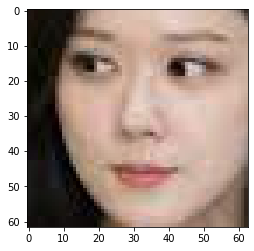

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.path.join(dir_path, file_list[0])
face = get_cropped_face(image_path)
plt.imshow(face)

In [15]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)
embedding = get_face_embedding(face)  
embedding

[array([-0.01353183,  0.02975583,  0.05504363, -0.09818371, -0.04114451,
         0.02571659, -0.08820774, -0.12446463,  0.10043381, -0.16789931,
         0.21221994, -0.0835636 , -0.24293348, -0.0444408 , -0.05963739,
         0.22769669, -0.16581883, -0.14141901, -0.0341469 ,  0.04019574,
         0.03314095,  0.05917819, -0.00506792,  0.02851591, -0.13027871,
        -0.31726381, -0.08154797, -0.02547948, -0.08596107, -0.02794846,
        -0.0808588 ,  0.09595017, -0.1647459 ,  0.04994755,  0.03882914,
         0.14573942, -0.03646055, -0.11067926,  0.12932397,  0.08716103,
        -0.30118433,  0.05070696,  0.05005507,  0.26568002,  0.20263687,
        -0.08683445, -0.02911422, -0.11955687,  0.11678027, -0.23963606,
         0.04365647,  0.10211772,  0.05502907,  0.09292123, -0.00258342,
        -0.10406267,  0.06285565,  0.13254724, -0.14822578, -0.00053937,
         0.12242688, -0.13877772,  0.02573177, -0.09712863,  0.13566764,
         0.12088631, -0.10751755, -0.25168771,  0.0

In [19]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    file_list = list(filter(lambda file: not file.startswith("."), file_list))
    embedding_dict = {}
    for file in file_list:
        img_path = os.path.join(dir_path, file)
    
        #  face_recognition.face_locations를 이용했을때 어떤 이미지는 얼굴영역을 제대로 찾지 못하는 경우도 있습니다.이 경우를 예외처리 해줍니다.    
        try : 
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
        except : 
            face = ""
            embedding = ""
                
        # 얼굴영역 face가 제대로 detect된 경우에면 dict에 embedding값을 저장해 줍니다.
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]# os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
    
    return embedding_dict


In [20]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict["jooyoung"] # 업로드한 사진의 이름을 넣어주세요.

array([-0.02391924,  0.00325   ,  0.02326868, -0.01046157, -0.154551  ,
       -0.004023  , -0.06195812, -0.04439363,  0.10327784, -0.13081424,
        0.16025195, -0.05082688, -0.19878526, -0.06331087, -0.0571992 ,
        0.17599839, -0.14188413, -0.1822522 , -0.04482011, -0.04758394,
        0.04098655,  0.03087543, -0.02976617,  0.00179283, -0.14610782,
       -0.32808068, -0.10076629, -0.09011872, -0.03035819, -0.02516931,
       -0.06506405,  0.11790398, -0.13105369, -0.03282398,  0.06739058,
        0.11425409, -0.00963945, -0.09563932,  0.18416363,  0.02945201,
       -0.22633427,  0.0033475 ,  0.0484084 ,  0.22226742,  0.13294406,
        0.02599786,  0.04089516, -0.09257941,  0.13448425, -0.16312034,
        0.03147218,  0.20187065,  0.07413121,  0.1024507 ,  0.00419509,
       -0.07944365,  0.08454776,  0.08613042, -0.11426751, -0.03722244,
        0.07045114, -0.10031731, -0.01907729, -0.1087769 ,  0.18718171,
        0.04982514, -0.07117414, -0.20121484,  0.13324337, -0.15

In [22]:
import face_recognition

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

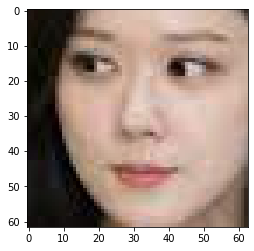

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.path.join(dir_path, file_list[0])
face = get_cropped_face(image_path)
plt.imshow(face)

In [33]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [34]:
my_faces = ["me", "jooyoung"]

def get_nearest_face(name, top=2):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    sorted_faces = list(filter(lambda face: face[0] not in my_faces, sorted_faces))
    num_faces = len(sorted_faces)
    
    for i in range(min(num_faces, top+1)):
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [35]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


In [37]:
import numpy as np

In [38]:
get_nearest_face("me", top=2)

순위 0 : 이름(d2), 거리(0.4919614825903834)
순위 1 : 이름(d4), 거리(0.5254961257170706)
순위 2 : 이름(d7), 거리(0.5260505655199156)


In [39]:
get_nearest_face("jooyoung", top=2)

순위 0 : 이름(d6), 거리(0.4817747899941213)
순위 1 : 이름(d2), 거리(0.5262563634199137)
순위 2 : 이름(d8), 거리(0.5408765229185213)


In [40]:
def get_face_embedding_dict(dir_path):
    # [[YOUR CODE]]
        
    return embedding_dict